### Resources

- http://hdr.undp.org/sites/default/files/hdr2019_technical_notes.pdf
- http://hdr.undp.org/en/data#

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
hdi = pd.read_csv('./data/human-development-index.csv', header=1)
hdi.head()

,HDI Rank (2018),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,170,Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,...,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
1,69,Albania,0.644,0.625,0.608,0.611,0.617,0.629,0.639,0.639,...,0.729,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791
2,82,Algeria,0.578,0.582,0.589,0.593,0.597,0.602,0.610,0.619,...,0.720,0.730,0.738,0.737,0.746,0.749,0.751,0.755,0.758,0.759
3,36,Andorra,..,..,..,..,..,..,..,..,...,0.830,0.828,0.827,0.849,0.846,0.853,0.850,0.854,0.852,0.857
4,149,Angola,..,..,..,..,..,..,..,..,...,0.508,0.510,0.525,0.537,0.547,0.557,0.565,0.570,0.576,0.574


In [3]:
hdi["HDIRank(2012)"] = hdi["2012"].rank(method='dense', ascending=False)
# convert countries to numbeo notation
hdi.loc[hdi['Country'] == 'Czechia', 'Country'] = 'Czech Republic'
hdi.loc[hdi['Country'] == 'Iran (Islamic Republic of)', 'Country'] = 'Iran'
hdi.loc[hdi['Country'] == 'Russian Federation', 'Country'] = 'Russia'
hdi.head()

,HDI Rank (2018),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,HDIRank(2012)
0,170,Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,...,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496,155.0
1,69,Albania,0.644,0.625,0.608,0.611,0.617,0.629,0.639,0.639,...,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791,59.0
2,82,Algeria,0.578,0.582,0.589,0.593,0.597,0.602,0.610,0.619,...,0.730,0.738,0.737,0.746,0.749,0.751,0.755,0.758,0.759,75.0
3,36,Andorra,..,..,..,..,..,..,..,..,...,0.828,0.827,0.849,0.846,0.853,0.850,0.854,0.852,0.857,31.0
4,149,Angola,..,..,..,..,..,..,..,..,...,0.510,0.525,0.537,0.547,0.557,0.565,0.570,0.576,0.574,137.0


In [4]:
dfNumbeo = pd.read_csv(r"data/Numbeo.csv",sep=";",decimal=",")
dfNumbeo.columns = ['Period', 'City', 'NumbeoIndex', 'PurchasingPower', 'Safety', 'HealthCare', 'CostOfLiving', 'PropertyPriceToIncomeRatio', 'TrafficCommuteTime','Pollution', 'Climate']

dfNumbeo[['City','Country','Country2']] = dfNumbeo['City'].str.split(',',expand=True)
#why does it introduce another column?
#dfNumbeo.to_csv("numbeoprocessed.csv", index=False)
#Answer United States is part of the city name, so dropping this column...
dfNumbeo.drop('Country2', axis=1, inplace=True)
dfNumbeo2012 = dfNumbeo.set_index('Period').loc['2012-Q1',:]
dfNumbeo2012.reset_index(inplace=True)
dfNumbeo2012['Country'] = dfNumbeo2012.Country.str.strip()
dfNumbeo2012.set_index('City',inplace=True, drop=False)
# fix us of a cities/country
dfNumbeo2012.loc['San Francisco','Country'] = "United States"
dfNumbeo2012.loc['Los Angeles','Country'] = "United States"
dfNumbeo2012.loc['New York','Country'] = "United States"
dfNumbeo2012["NumbeoRank"] = dfNumbeo2012["NumbeoIndex"].rank(ascending=False) 
dfNumbeo2012



,Period,City,NumbeoIndex,PurchasingPower,Safety,HealthCare,CostOfLiving,PropertyPriceToIncomeRatio,TrafficCommuteTime,Pollution,Climate,Country,NumbeoRank
City,,,,,,,,,,,,,
Berlin,2012-Q1,Berlin,215.25,140.62,77.34,64.81,89.06,5.74,23.00,40.00,NaN,Germany,1.0
Zurich,2012-Q1,Zurich,213.18,136.31,83.85,77.78,166.07,8.27,27.33,26.50,NaN,Switzerland,2.0
Edmonton,2012-Q1,Edmonton,204.86,124.69,58.98,78.89,112.10,3.59,35.33,21.25,NaN,Canada,3.0
Perth,2012-Q1,Perth,196.00,118.34,48.75,87.04,142.18,5.24,27.00,15.00,NaN,Australia,4.0
Calgary,2012-Q1,Calgary,190.78,124.25,71.88,70.42,111.71,4.58,62.00,25.08,NaN,Canada,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cairo,2012-Q1,Cairo,-35.66,18.35,61.33,70.83,52.69,15.51,58.75,129.50,NaN,Egypt,57.0
Tehran,2012-Q1,Tehran,-50.44,47.52,43.27,43.40,60.86,13.72,73.50,140.75,NaN,Iran,58.0
Moscow,2012-Q1,Moscow,-54.72,46.75,47.33,37.75,86.77,28.06,61.50,116.61,NaN,Russia,59.0


In [5]:
print(f'number numbeo rows {dfNumbeo2012.shape[0]}')
print(f'number hdi rows {hdi.shape[0]}')
print(f'number of numbeo countries in hdi {dfNumbeo2012[dfNumbeo2012.Country.isin(hdi.Country)].shape[0]}')
print(f'number of hdi countries in numbeo {hdi[hdi.Country.isin(dfNumbeo2012.Country)].shape[0]}')
print(f'number of numbeo countries not in hdi {dfNumbeo2012[~dfNumbeo2012.Country.isin(hdi.Country)].shape[0]}')
print(f'number of hdi countries not in numbeo {hdi[~hdi.Country.isin(dfNumbeo2012.Country)].shape[0]}')

number numbeo rows 61
number hdi rows 212
number of numbeo countries in hdi 61
number of hdi countries in numbeo 40
number of numbeo countries not in hdi 0
number of hdi countries not in numbeo 172


In [6]:
numbeo2012_vs_hdi = pd.merge(dfNumbeo2012, hdi, how='inner', on='Country')
print(f'joined {numbeo2012_vs_hdi.shape[0]} cities from numbeo with countries from hdi')

joined 61 cities from numbeo with countries from hdi


spearman relation between Numbeo and HDI: SpearmanrResult(correlation=0.7484288311224342, pvalue=4.099272073255796e-12)


<Figure size 936x936 with 0 Axes>

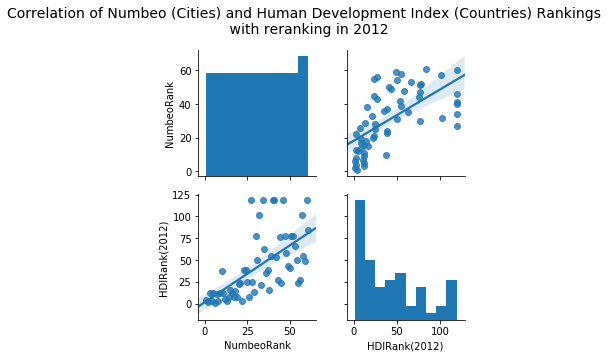

In [7]:
fig = plt.figure(figsize=(13,13))
g = sns.pairplot(numbeo2012_vs_hdi.loc[:,['NumbeoRank','HDIRank(2012)']],kind="reg")
g.fig.suptitle("Correlation of Numbeo (Cities) and Human Development Index (Countries) Rankings \n with reranking in 2012", y=0.97,fontsize=14)
g.fig.subplots_adjust(top=0.85,left=0.2,bottom=0.1)
g.fig.savefig('visuals/CorrelationOfNumbeoRanking2012withHDI.png')

spearman_numbeo_hdi_2012 = spearmanr(numbeo2012_vs_hdi.NumbeoRank, numbeo2012_vs_hdi['HDIRank(2012)'])
print(f'spearman relation between Numbeo and HDI: {spearman_numbeo_hdi_2012}')

spearman relation between Numbeo and HDI: SpearmanrResult(correlation=0.7484288311224342, pvalue=4.099272073255796e-12)


<Figure size 936x936 with 0 Axes>

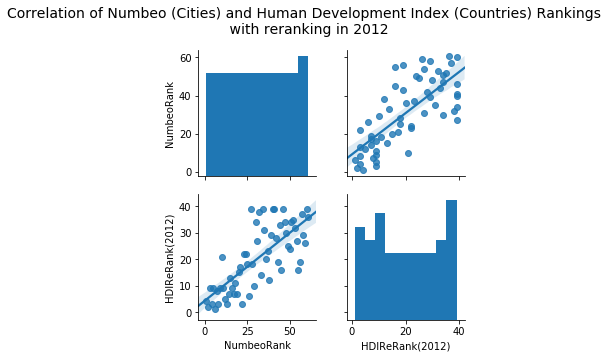

In [8]:
numbeo2012_vs_hdi["HDIReRank(2012)"] = numbeo2012_vs_hdi["HDIRank(2012)"].rank(method='dense', ascending=True) 

fig = plt.figure(figsize=(13,13))
g = sns.pairplot(numbeo2012_vs_hdi.loc[:,['NumbeoRank','HDIReRank(2012)']],kind="reg")
g.fig.suptitle("Correlation of Numbeo (Cities) and Human Development Index (Countries) Rankings \n with reranking in 2012", y=0.97,fontsize=14)
g.fig.subplots_adjust(top=0.85,left=0.2,bottom=0.1)
g.fig.savefig('visuals/CorrelationOfNumbeoReRanking2012withHDI.png')

spearman_numbeo_hdi_2012 = spearmanr(numbeo2012_vs_hdi.NumbeoRank, numbeo2012_vs_hdi['HDIReRank(2012)'])
print(f'spearman relation between Numbeo and HDI: {spearman_numbeo_hdi_2012}')

In [9]:
numbeo2012_vs_hdi["CityPerformance"] = numbeo2012_vs_hdi["NumbeoRank"] - numbeo2012_vs_hdi["HDIRank(2012)"]

In [10]:
numbeo2012_vs_hdi.sort_values("CityPerformance", ascending=True)[["City", "Country", "NumbeoRank", "HDIRank(2012)"]].head(10)

,City,Country,NumbeoRank,HDIRank(2012)
27,Bangalore,India,27.0,119.0
28,Pune,India,34.0,119.0
29,Chennai,India,40.0,119.0
30,Delhi,India,41.0,119.0
31,Mumbai,India,46.0,119.0
39,Johannesburg,South Africa,32.0,102.0
32,Kolkata,India,60.0,119.0
34,Curitiba,Brazil,30.0,77.0
57,Cairo,Egypt,57.0,101.0
49,Bogota,Colombia,44.0,76.0


In [11]:
numbeo2012_vs_hdi.sort_values("CityPerformance", ascending=False)[["City", "Country", "NumbeoRank", "HDIRank(2012)"]].head(10)

,City,Country,NumbeoRank,HDIRank(2012)
51,Rome,Italy,55.0,23.0
48,Athens,Greece,56.0,27.0
44,London,United Kingdom,38.0,15.0
50,Milan,Italy,45.0,23.0
26,Singapore,Singapore,26.0,7.0
10,Melbourne,Australia,22.0,3.0
33,Brussels,Belgium,29.0,13.0
47,Thessaloniki,Greece,43.0,27.0
40,Paris,France,33.0,21.0
17,New York,United States,19.0,8.0
